In [2]:
from TSPGraph import Graph
import numpy as np
from functools import lru_cache

In [3]:
graphs = [Graph('A'),Graph('B'),Graph('C'),Graph('D')]

In [4]:
@lru_cache(maxsize=1_000_000)
def addition_cost(graph, triplet):
    return graph.objective[triplet[0], triplet[1]] + graph.objective[triplet[1], triplet[2]] - graph.objective[triplet[0], triplet[2]]

In [156]:
def getRegret2(graph, cycle):
    candidates = np.delete(np.arange(200), cycle)
    regrets = [-9999] * 200
    solutions = [0] * 200
    for candidate in candidates:
        currentCosts = []
        currentSolutions = []
        for i in range(len(cycle) - 1):
            currentCosts.append(graph.cycle_cost(cycle) + addition_cost(graph,(cycle[i],candidate,cycle[i+1])))
            currentSolutions.append(np.concatenate((cycle[:i + 1],np.array([candidate]).reshape((1,)), cycle[i + 1:])))
        firstBestId = np.argmin(currentCosts)
        firstBestCost = currentCosts[firstBestId]
        currentCosts = np.delete(currentCosts, firstBestId)
        secondBestId = np.argmin(currentCosts)
        secondBestCost = currentCosts[secondBestId]
        bestSolution = currentSolutions[firstBestId]

        regrets[candidate] = secondBestCost - firstBestCost
        solutions[candidate] = bestSolution

    bestRegretId = np.argmax(regrets)
    cycle = solutions[bestRegretId]
        

    return cycle

In [187]:
for graph in graphs:    
    costs_r2 = []
    cycles_r2 = []
    for i in range(200):
        a=np.array([i])
        a = add_nn(graph, a)
        a = np.append(a,a[0])
        while(len(a)<51):
            a = getRegret2(graph, a)
        costs_r2.append(graph.cycle_cost(a))
        cycles_r2.append(a) 
    print(np.min(costs_r2), np.max(costs_r2), np.mean(costs_r2))

55406 68597 60526.085
55720 72950 63892.035
34304 41741 37736.26
35862 44502 39648.695


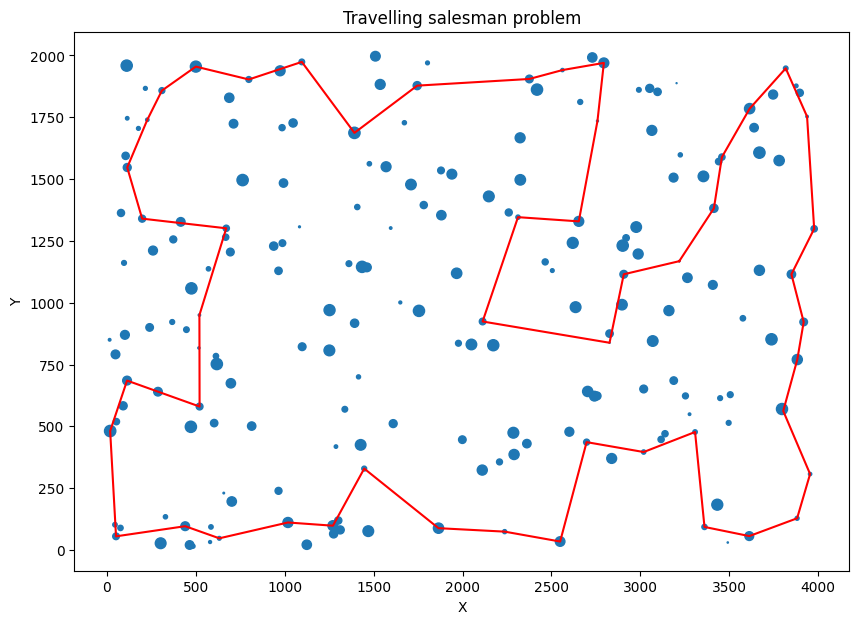

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [196]:
graph.plot(cycle=cycles_r2[np.argmin(costs_r2)])

In [188]:
def getRegret2Weighted(graph, cycle):
    candidates = np.delete(np.arange(200), cycle)
    costs = [-9999999] * 200
    solutions = [0] * 200
    weigth = 0.61
    scores = [-9999999] * 200
    temporaryCost = graph.cycle_cost(cycle)
    for candidate in candidates:
        currentCosts = []
        currentSolutions = []
        for i in range(len(cycle) - 1):
            currentCosts.append(graph.cycle_cost(cycle) + addition_cost(graph,(cycle[i],candidate,cycle[i+1])))
            currentSolutions.append(np.concatenate((cycle[:i + 1],np.array([candidate]).reshape((1,)), cycle[i + 1:])))
        firstBestId = np.argmin(currentCosts)
        firstBestCost = currentCosts[firstBestId]
        currentCosts = np.delete(currentCosts, firstBestId)
        secondBestId = np.argmin(currentCosts)
        secondBestCost = currentCosts[secondBestId]
        bestSolution = currentSolutions[firstBestId]

        newTemporaryCost = graph.cycle_cost(bestSolution)
        difference = newTemporaryCost - temporaryCost
        scores[candidate] = weigth * (secondBestCost - firstBestCost) - (1 - weigth) * difference
        costs[candidate] = newTemporaryCost
        solutions[candidate] = bestSolution

    bestRegretId = np.argmax(scores)
    cycle = solutions[bestRegretId]
    temporaryCost = costs[bestRegretId]

    return cycle

In [189]:
for graph in graphs:    
    costs_r2w = []
    cycles_r2w = []
    for i in range(200):
        a=np.array([i])
        a = add_nn(graph, a)
        a = np.append(a,a[0])
        while(len(a)<51):
            a = getRegret2Weighted(graph, a)
        costs_r2w.append(graph.cycle_cost(a))
        cycles_r2w.append(a) 
    print(np.min(costs_r2w), np.max(costs_r2w), np.mean(costs_r2w))

31938 40870 36038.36
31734 39435 34565.44
25074 29950 26735.705
22772 28006 24805.69


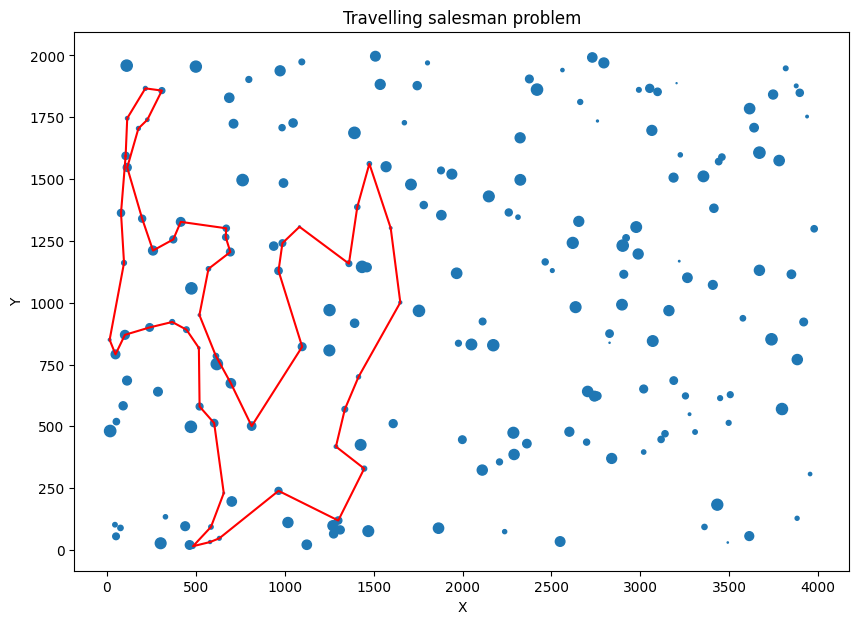

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [195]:
graph.plot(cycle=cycles_r2w[np.argmin(costs_r2w)])

In [204]:
for graph in graphs:    
    costs_r2 = []
    cycles_r2 = []
    for i in range(200):
        a=np.array([i])
        a = add_nn(graph, a)
        a = np.append(a,a[0])
        while(len(a)<101):
            a = getRegret2(graph, a)
        costs_r2.append(graph.cycle_cost(a))
        cycles_r2.append(a) 
    print(np.min(costs_r2), np.max(costs_r2), np.mean(costs_r2))

104829 124764 116240.25
109774 128550 118806.91
65095 73090 69013.725
64682 74903 70442.125


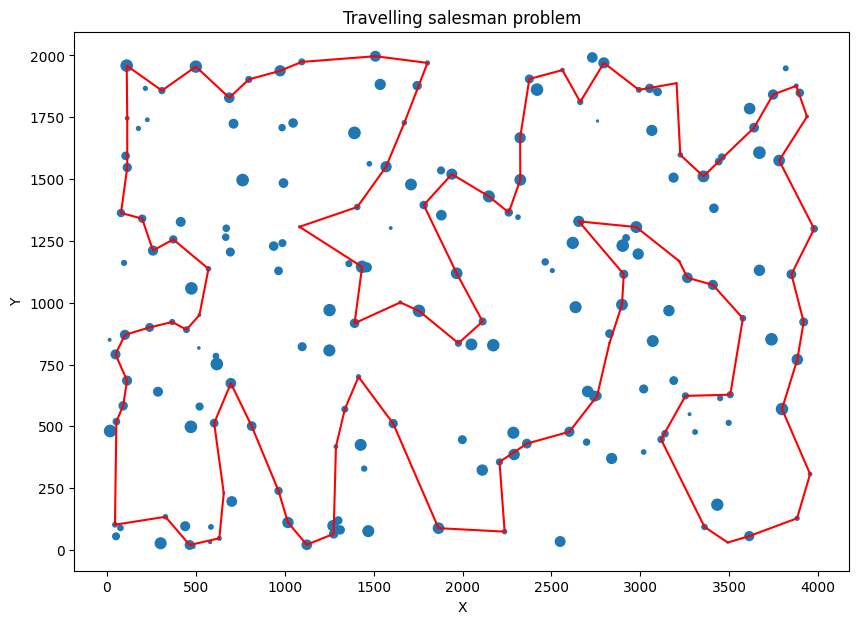

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [205]:
graph.plot(cycle=cycles_r2[np.argmin(costs_r2)])

In [206]:
for graph in graphs:    
    costs_r2w = []
    cycles_r2w = []
    for i in range(200):
        a=np.array([i])
        a = add_nn(graph, a)
        a = np.append(a,a[0])
        while(len(a)<101):
            a = getRegret2Weighted(graph, a)
        costs_r2w.append(graph.cycle_cost(a))
        cycles_r2w.append(a) 
    print(np.min(costs_r2w), np.max(costs_r2w), np.mean(costs_r2w))

74876 80095 76230.385
69479 79343 73192.55
53167 58640 55141.25
46799 56422 52197.12


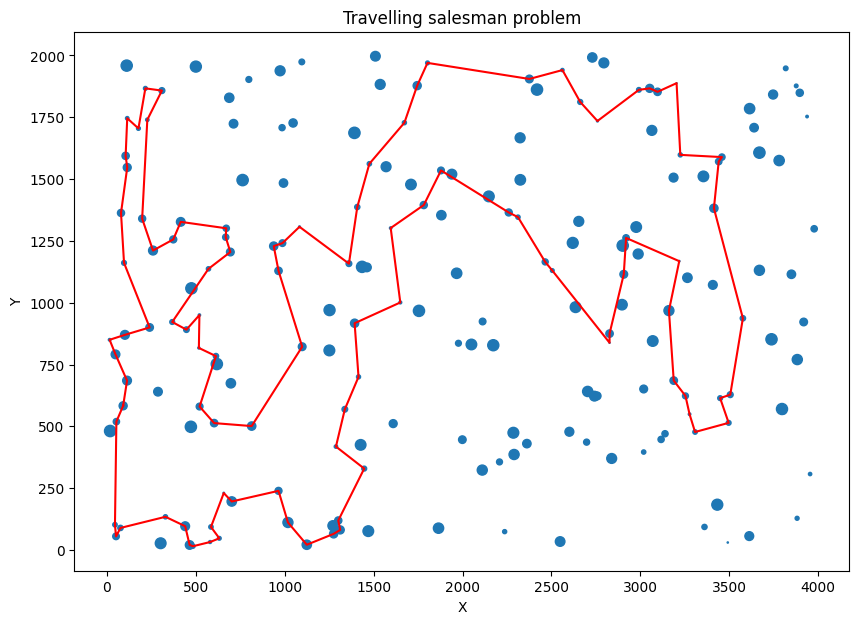

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [207]:
graph.plot(cycle=cycles_r2w[np.argmin(costs_r2w)])